# ***LABORATORIO 1***
## ***modelo de regresion lineal multivariable, regresion polinomica y el calculo por la ecuacion de la normal***

Lo que se quiere buscar es poder predecir la temperatura máxima en un dia
Y: es temperatura Maxima
X: temperatura mínima, lluvia, velocidad de ráfaga de viento, velocidad del viento 9 a. m., velocidad del viento 3 p. m., humedad 9 a. m., humedad 3 p. m., presión 9 a. m., presión 3 p. m., nube 9 a. m., nube 3 p. m., temperatura 9 a. m., temperatura 3 p. m


In [214]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [215]:
# Conectamos nuestro Drive al Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ***1. MULTIVARIABLE***

In [216]:
# Cargar datos desde un archivo con el formato especificado
data = np.genfromtxt('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab1/dataset.txt', delimiter=';', skip_header=1)


# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:", len(data))

# Mostrar algunos puntos de datos
print("Mostramos solo 20 datos")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'Y'))
print('-'*135)
for i in range(20):  # Mostrar solo los primeros 10 datos
    print('{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:10.1f}{:10.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}'.format(data[i, 0], data[i, 1], data[i, 2], data[i, 3], data[i, 4], data[i, 5], data[i, 6], data[i, 7], data[i, 8], data[i, 9], data[i, 10], data[i, 11], data[i, 12], data[i, 13]))



Cantidad de filas: 10500
Mostramos solo 20 datos
      X1      X2      X3      X4      X5      X6        X7        X8      X9     X10     X11     X12     X13       Y
---------------------------------------------------------------------------------------------------------------------------------------
     0.0    44.0     4.0    22.0    44.0    25.0    1010.6    1007.8     0.0     0.0    17.2    24.3     7.4    25.1
     0.0    46.0    19.0    26.0    38.0    30.0    1007.6    1008.7     0.0     2.0    21.0    23.2    12.9    25.7
     0.0    24.0    11.0     9.0    45.0    16.0    1017.6    1012.8     0.0     0.0    18.1    26.5     9.2    28.0
     1.0    41.0     7.0    20.0    82.0    33.0    1010.8    1006.0     7.0     8.0    17.8    29.7    17.5    32.3
     0.2    56.0    19.0    24.0    55.0    23.0    1009.2    1005.4     0.0     0.0    20.6    28.9    14.6    29.7
     0.0    50.0    20.0    24.0    49.0    19.0    1009.6    1008.2     1.0     0.0    18.1    24.6    14.3    2

# ***1.1 Normalización de caracteristicas***
Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [217]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [218]:
# Separar las características (X) de la variable objetivo (Y)
X = data[:, :13]
y = data[:, 13]

m = len(data)
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:",m )

# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

# Mostrar algunos puntos de datos normalizados
print("Mostramos solo 10 datos normalizados")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'Y'))
print('-'*115)
for i in range(10):  # Mostrar solo los primeros 20 datos normalizados
    print('{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:10.4f}{:10.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12]))
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)


Cantidad de filas: 10500
Mostramos solo 10 datos normalizados
      X1      X2      X3      X4      X5      X6        X7        X8      X9     X10     X11     X12       Y
-------------------------------------------------------------------------------------------------------------------
 -0.2433  0.7154 -0.9233  0.8626 -1.0626 -0.9658    0.0880    0.0896 -0.7065 -0.7670  0.0722  0.2454 -0.6699
 -0.2433  0.8661  1.0679  1.3797 -1.3343 -0.7364    0.0668    0.0959 -0.7065 -0.1014  0.6795  0.0889  0.1999
 -0.2433 -0.7918  0.0059 -0.8180 -1.0173 -1.3786    0.1374    0.1245 -0.7065 -0.7670  0.2160  0.5584 -0.3852
 -0.1370  0.4893 -0.5250  0.6040  0.6580 -0.5988    0.0894    0.0771  1.5835  1.8953  0.1681  1.0138  0.9273
 -0.2220  1.6197  1.0679  1.1211 -0.5645 -1.0575    0.0781    0.0729 -0.7065 -0.7670  0.6156  0.9000  0.4687
 -0.2433  1.1676  1.2006  1.1211 -0.8362 -1.2410    0.0809    0.0924 -0.3793 -0.7670  0.2160  0.2881  0.4213
 -0.2433  0.0372 -0.6578  0.2162 -0.8815 -1.2410    0.1077 

Añadimos fila X0 de puros unos (1)

In [219]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -0.24326455  0.71542621 ...  0.07221009  0.24539384
  -0.66988578]
 [ 1.         -0.24326455  0.866145   ...  0.6794908   0.0888676
   0.19987277]
 [ 1.         -0.24326455 -0.79176169 ...  0.21603973  0.55844631
  -0.38523752]
 ...
 [ 1.         -0.21138324 -0.11352713 ...  0.66350973  0.30231247
   1.02218995]
 [ 1.         -0.17950192 -0.49032411 ...  0.7913583   0.48729802
   1.13288649]
 [ 1.         -0.03072245 -0.26424592 ...  0.59958545  0.24539384
   1.00637616]]


# ***1.2 Descenso por el gradiente***
 El descenso por el gradiente es un algoritmo de optimización utilizado en el aprendizaje automático para minimizar una función de costo. Funciona ajustando iterativamente los parámetros en la dirección que más reduce el valor de la función de costo, calculando la derivada parcial de la función de costo con respecto a cada parámetro y actualizando los parámetros en la dirección opuesta a la derivada. Este proceso se repite hasta que se alcanza un mínimo de la función de costo o se alcanza un número máximo de iteraciones. El tamaño del paso de cada actualización, conocido como tasa de aprendizaje, es un hiperparámetro importante que afecta la convergencia y estabilidad del algoritmo. El descenso por el gradiente es fundamental en el aprendizaje automático y se utiliza en una variedad de algoritmos para entrenar modelos.

In [220]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # hipotesis o y predicha
    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [221]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # alfa => coeficiente de aprendizaje

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# ***1.3 Seleccionando coheficientes de aprendizaje***


theta calculado por el descenso por el gradiente: [24.00008567 -0.07538307  0.45851113 -0.38717018 -0.26738756  0.27679066
 -0.78786892  0.36068281 -0.47430504 -0.18990254  0.07313506  1.75924265
  4.60824043  0.65321342]


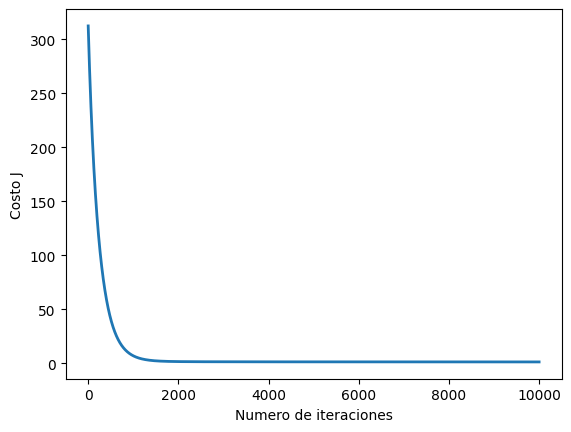

In [222]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.002 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [223]:
# Datos para predecir
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0, 20.6, 29.1, 9.9],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0, 24.7, 33, 15.6],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0, 25.8, 34.8, 15.1],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8, 22.9, 18.3, 21.5],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6, 10.1, 14.6, 10.1],
    [1, 3.2, 43, 11, 22, 62, 32, 1015.4, 1015.9, 0, 2, 11.8, 19.4, 5.8],
    [1, 0, 44, 7, 13, 63, 28, 1020.9, 1018.3, 0, 0, 15.5, 24.8, 7.7],
    [1, 0, 31, 9, 13, 55, 20, 1016.7, 1011.3, 0, 0, 18.4, 30.4, 10.2],
    [1, 0, 50, 6, 22, 56, 31, 1006.2, 1001.4, 0, 1, 22.1, 29.2, 18.1],
    [1, 3.2, 35, 7, 7, 68, 36, 1014.6, 1012.2, 0, 8, 18, 27.2, 12]
])

# Calcular las predicciones
y_pred = np.dot(data_new, theta)

# Visualizar las predicciones
print('Predicciones de temperatura máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')


Predicciones de temperatura máxima para las nuevas características:
Predicción 1: 84.58
Predicción 2: 116.65
Predicción 3: 136.46
Predicción 4: 13.08
Predicción 5: -13.52
Predicción 6: 23.77
Predicción 7: 65.18
Predicción 8: 96.88
Predicción 9: 103.08
Predicción 10: 76.97


# ***2. POLINOMIAL***

In [224]:
# Cargar datos desde un archivo con el formato especificado
data = np.genfromtxt('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab1/dataset.txt', delimiter=';', skip_header=1)


# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:", len(data))

# Mostrar algunos puntos de datos
print("Mostramos solo 20 datos")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'Y'))
print('-'*135)
for i in range(20):  # Mostrar solo los primeros 10 datos
    print('{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:10.1f}{:10.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}{:8.1f}'.format(data[i, 0], data[i, 1], data[i, 2], data[i, 3], data[i, 4], data[i, 5], data[i, 6], data[i, 7], data[i, 8], data[i, 9], data[i, 10], data[i, 11], data[i, 12], data[i, 13]))


Cantidad de filas: 10500
Mostramos solo 20 datos
      X1      X2      X3      X4      X5      X6        X7        X8      X9     X10     X11     X12     X13       Y
---------------------------------------------------------------------------------------------------------------------------------------
     0.0    44.0     4.0    22.0    44.0    25.0    1010.6    1007.8     0.0     0.0    17.2    24.3     7.4    25.1
     0.0    46.0    19.0    26.0    38.0    30.0    1007.6    1008.7     0.0     2.0    21.0    23.2    12.9    25.7
     0.0    24.0    11.0     9.0    45.0    16.0    1017.6    1012.8     0.0     0.0    18.1    26.5     9.2    28.0
     1.0    41.0     7.0    20.0    82.0    33.0    1010.8    1006.0     7.0     8.0    17.8    29.7    17.5    32.3
     0.2    56.0    19.0    24.0    55.0    23.0    1009.2    1005.4     0.0     0.0    20.6    28.9    14.6    29.7
     0.0    50.0    20.0    24.0    49.0    19.0    1009.6    1008.2     1.0     0.0    18.1    24.6    14.3    2

--------------------------------------------------------------------------------

In [225]:
# Separar las características (X) de la variable objetivo (Y)
X = data[:, :13]
y = data[:, 13]

m = len(data)
# Mostrar la cantidad de filas en los datos
print("Cantidad de filas:",m )

# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

# Mostrar algunos puntos de datos normalizados
print("Mostramos solo 10 datos normalizados")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'Y'))
print('-'*115)
for i in range(10):  # Mostrar solo los primeros 20 datos normalizados
    print('{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:10.4f}{:10.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}{:8.4f}'.format(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11], X_norm[i, 12]))
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)


Cantidad de filas: 10500
Mostramos solo 10 datos normalizados
      X1      X2      X3      X4      X5      X6        X7        X8      X9     X10     X11     X12       Y
-------------------------------------------------------------------------------------------------------------------
 -0.2433  0.7154 -0.9233  0.8626 -1.0626 -0.9658    0.0880    0.0896 -0.7065 -0.7670  0.0722  0.2454 -0.6699
 -0.2433  0.8661  1.0679  1.3797 -1.3343 -0.7364    0.0668    0.0959 -0.7065 -0.1014  0.6795  0.0889  0.1999
 -0.2433 -0.7918  0.0059 -0.8180 -1.0173 -1.3786    0.1374    0.1245 -0.7065 -0.7670  0.2160  0.5584 -0.3852
 -0.1370  0.4893 -0.5250  0.6040  0.6580 -0.5988    0.0894    0.0771  1.5835  1.8953  0.1681  1.0138  0.9273
 -0.2220  1.6197  1.0679  1.1211 -0.5645 -1.0575    0.0781    0.0729 -0.7065 -0.7670  0.6156  0.9000  0.4687
 -0.2433  1.1676  1.2006  1.1211 -0.8362 -1.2410    0.0809    0.0924 -0.3793 -0.7670  0.2160  0.2881  0.4213
 -0.2433  0.0372 -0.6578  0.2162 -0.8815 -1.2410    0.1077 

In [226]:
def plotData(x, y):
  # Grafica los puntos x e y en una figura nueva
  fig = plt.figure() # abre una nueva figura

  plt.plot(x, y, 'ro', ms=10, mec='k')
  plt.xlabel('Información por minutos')
  plt.ylabel('temperaturasMax')


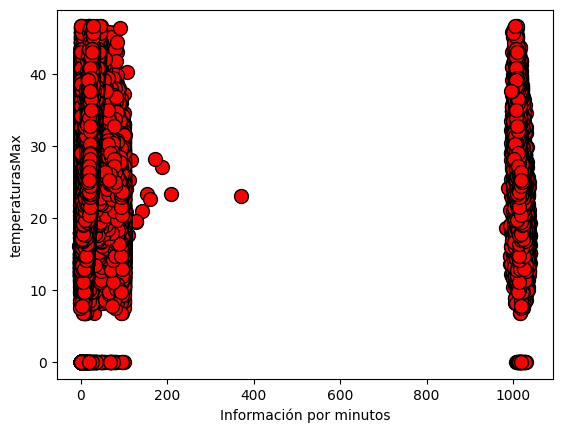

In [227]:
plotData(X, y)

In [228]:
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # promedio, media
  sigma = np.zeros(X.shape[1])  # desviasión estandar

  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [229]:
# Llamar a la funcion de normalización con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

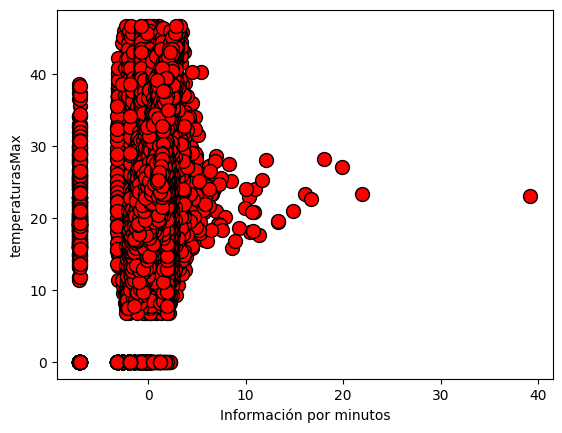

In [230]:
# Graficamos los datos ya normalizados
plotData(X_norm, y)

In [231]:
# Columna de unos para X0

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X)

[[ 1.         -0.24326455  0.71542621 ...  0.07221009  0.24539384
  -0.66988578]
 [ 1.         -0.24326455  0.866145   ...  0.6794908   0.0888676
   0.19987277]
 [ 1.         -0.24326455 -0.79176169 ...  0.21603973  0.55844631
  -0.38523752]
 ...
 [ 1.         -0.21138324 -0.11352713 ...  0.66350973  0.30231247
   1.02218995]
 [ 1.         -0.17950192 -0.49032411 ...  0.7913583   0.48729802
   1.13288649]
 [ 1.         -0.03072245 -0.26424592 ...  0.59958545  0.24539384
   1.00637616]]


# ***2.2 Descenso por el gradiente***

In [232]:
# Declaramos la funcion de costo

def computeCostMulti(X, y, theta):
  # Inicializamos el número de ejemplos de entrenamiento
  m = y.shape[0]

  J = 0
  h = np.dot(X, theta)

  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

In [233]:
# Declaramos la función el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iter):

  m = y.shape[0]
  theta = theta.copy()
  J_history = [] # historial de costo

  for i in range(num_iter):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(computeCostMulti(X, y, theta))

  return theta, J_history


# ***2.3 Seleccionando coheficientes de aprendizaje***

theta calculado por el descenso por el gradiente: [24.00008571 -0.07281127  0.45736774 -0.34734579 -0.23491161  0.02697234
 -0.38728671  0.69151884 -0.8444104  -0.17215613  0.06936078  1.27539677
  5.23644777  0.5541469 ]


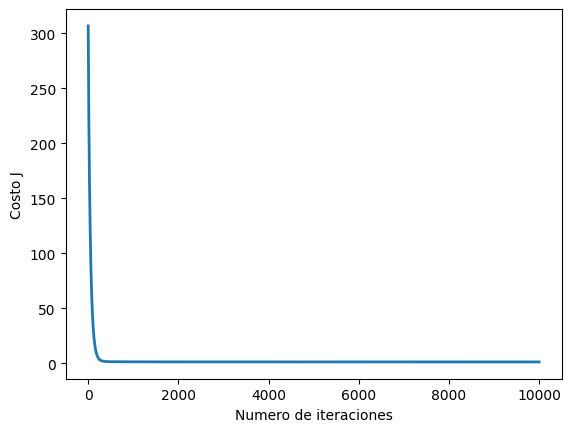

In [234]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [235]:
# Datos para predecir
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0, 20.6, 29.1, 9.9],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0, 24.7, 33, 15.6],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0, 25.8, 34.8, 15.1],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8, 22.9, 18.3, 21.5],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6, 10.1, 14.6, 10.1],
    [1, 3.2, 43, 11, 22, 62, 32, 1015.4, 1015.9, 0, 2, 11.8, 19.4, 5.8],
    [1, 0, 44, 7, 13, 63, 28, 1020.9, 1018.3, 0, 0, 15.5, 24.8, 7.7],
    [1, 0, 31, 9, 13, 55, 20, 1016.7, 1011.3, 0, 0, 18.4, 30.4, 10.2],
    [1, 0, 50, 6, 22, 56, 31, 1006.2, 1001.4, 0, 1, 22.1, 29.2, 18.1],
    [1, 3.2, 35, 7, 7, 68, 36, 1014.6, 1012.2, 0, 8, 18, 27.2, 12]
])

# Calcular las predicciones
y_pred = np.dot(data_new, theta)

# Visualizar las predicciones
print('Predicciones de temperatura máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')


Predicciones de temperatura máxima para las nuevas características:
Predicción 1: 51.79
Predicción 2: 84.7
Predicción 3: 101.78
Predicción 4: -5.16
Predicción 5: -46.33
Predicción 6: -11.95
Predicción 7: 29.5
Predicción 8: 63.16
Predicción 9: 70.52
Predicción 10: 43.09


# ***Ecuacion de la Normal***

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz  X  para tener el termino de intersección( θ0 ).

In [236]:
# Importación de librerías
import numpy as np
import pandas as pd

# Carga de datos desde un archivo con formato especificado
data = np.genfromtxt('/content/gdrive/MyDrive/SIS420/LABORATORIOS/Lab1/dataset.txt', delimiter=';', skip_header=1)

# Separación de las características y la variable objetivo
X = data[:, :13]
y = data[:, 13]

# Conversión de la variable objetivo a tipo float
y = y.astype(float)

# Adición de una columna de unos a la matriz de características
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)



In [246]:
# Definición de la función para calcular los parámetros con la ecuación de la normal
def normalEqn(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return theta

# Cálculo de los parámetros con la ecuación de la normal
theta = normalEqn(X, y)

# Visualización de los resultados
print('Theta calculado a partir de la ecuación de la normal:')
print(theta)



Theta calculado a partir de la ecuación de la normal:
[ 4.33790059e+00 -7.76544746e-03  3.44506588e-02 -4.61022254e-02
 -3.00372730e-02  6.38392465e-04 -1.70419593e-02  4.99403648e-03
 -6.00960996e-03 -5.68284179e-02  2.31736518e-02  1.97800677e-01
  7.48933418e-01  8.95501696e-02]


In [247]:
# Datos para predecir
data_new = np.array([
    [1, 0, 33, 20, 13, 46, 23, 1022.9, 1019.8, 0, 0, 20.6, 29.1, 9.9],
    [1, 0, 28, 13, 11, 38, 19, 1020.4, 1015.2, 0, 0, 24.7, 33, 15.6],
    [1, 0, 44, 9, 30, 47, 15, 1013.9, 1009.3, 0, 0, 25.8, 34.8, 15.1],
    [1, 0, 54, 9, 7, 62, 93, 1004, 1002.3, 1, 8, 22.9, 18.3, 21.5],
    [1, 29.4, 56, 20, 28, 90, 60, 1000.8, 1001.3, 8, 6, 10.1, 14.6, 10.1],
    [1, 3.2, 43, 11, 22, 62, 32, 1015.4, 1015.9, 0, 2, 11.8, 19.4, 5.8],
    [1, 0, 44, 7, 13, 63, 28, 1020.9, 1018.3, 0, 0, 15.5, 24.8, 7.7],
    [1, 0, 31, 9, 13, 55, 20, 1016.7, 1011.3, 0, 0, 18.4, 30.4, 10.2],
    [1, 0, 50, 6, 22, 56, 31, 1006.2, 1001.4, 0, 1, 22.1, 29.2, 18.1],
    [1, 3.2, 35, 7, 7, 68, 36, 1014.6, 1012.2, 0, 8, 18, 27.2, 12]
])

# Calcular las predicciones
y_pred = np.dot(data_new, theta)

# Visualizar las predicciones
print('Predicciones de temperatura máxima para las nuevas características:')
for i, pred in enumerate(y_pred, start=1):
    print(f'Predicción {i}: {pred.round(2)}')


Predicciones de temperatura máxima para las nuevas características:
Predicción 1: 29.53
Predicción 2: 34.07
Predicción 3: 35.83
Predicción 4: 23.31
Predicción 5: 15.81
Predicción 6: 20.52
Predicción 7: 26.01
Predicción 8: 30.62
Predicción 9: 31.52
Predicción 10: 28.59


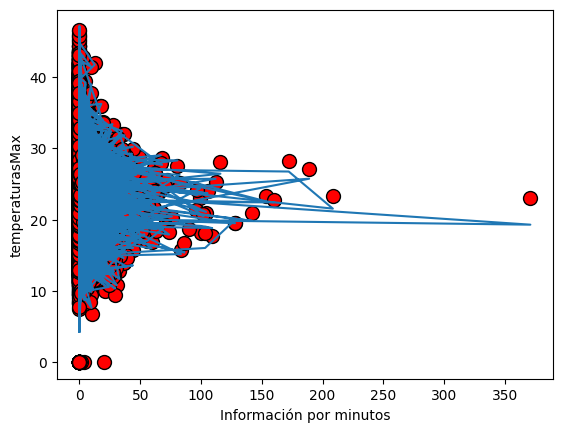

In [248]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')